# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

The issue with formatting is that if you try to convert dollars to numeric, the commas used in any dollar amount above 999 would cause the conversion to fail. The commas are a string and can not be converted to a numeric variable

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

9,848 values out of 12,925 values are missing (NaN). That is about 77 percent. The most noteable pattern is that Less Lethal and Maximal Restraint Technique only have missing values.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [4]:
! git clone https://github.com/ds4e/get_data
%run ./get_data/get_data.py

Cloning into 'get_data'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 109 (delta 37), reused 30 (delta 30), pack-reused 63 (from 1)
Receiving objects: 100% (109/109), 657.47 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Download complete
Extracting data files...
Data extracted


Question 1 Part 1

The issue with formatting is that if you try to convert dollars to numeric, the commas used in any dollar amount above 999 would cause the conversion to fail. The commas are a string and can not be converted to a numeric variable.

In [5]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Question 1 Part 2

9,848 values out of 12,925 values are missing (NaN). That is about 77 percent. The most noteable pattern is that Less Lethal and Maximal Restraint Technique only have missing values.


In [21]:
import pandas as pd

df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')
df.head()
df["subject_injury"].value_counts(dropna=False)
df["subject_injury_clean"] = df["subject_injury"].copy()
missing = df["subject_injury_clean"].isna().mean()
missing

np.float64(0.7619342359767892)

In [22]:
pd.crosstab(
    df["force_type"],
    df["subject_injury_clean"],
    dropna=False
)

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [24]:
df["subject_injury_clean"] = df["subject_injury_clean"].fillna("Missing")
df["subject_injury_clean"].value_counts()

,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


Question 1 Part 3

In [25]:
import pandas as pd

df = pd.read_csv('/content/data/metabric.csv', encoding='latin1')
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [28]:
df["overall_survival_dummy"] = df["Overall Survival Status"].map({
    "0:LIVING": 1,
    "1:DECEASED": 0
})

df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,overall_survival_dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,0


Question 1 Part 4

There are 8323 missing values in Review Scores Rating. By making the missing values the median, you are reducing the true variance and are potentially overvaluing or undervaluing the true value.

In [29]:
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [43]:
df["Review Scores Rating"].isna().sum()

np.int64(8323)

In [41]:
median = df["Review Scores Rating"].median()
median

94.0

In [42]:
df["Review_Score_Median"] = df["Review Scores Rating"].fillna(median)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review_Score_Imputed,Review_Score_Median
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

1. Since it is an excel file, you would use read_excel()

In [6]:
df = pd.read_excel("https://sharkattackfile.net/spreadsheets/GSAF5.xls")
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.

In [44]:
df = df.drop(columns=["Unnamed: 22"])
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39.0,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11.0,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN


3. An observation in this case is a shark attack. Each row in this file is a observation. It affects your choice of cleaning because you need to decide what observations to keep and not to keep. It a observation is missing too many columns or variables, then it is something you should consider dropping due to lack of data.

4. The range of values for year go from 0.0 to 2026. The 0.0 year values seem to have a range when looking at the "Date" column and not a specific date, so that is why they do not have a year. The number of attacks are increasing. Between 1940 and 2004 there were 0 years with 100+ shark attack reports. From 2005 and forward, there have been 18 years with 100+ shark attack reportings.

In [9]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].min(), df["Year"].max()

(0.0, 2026.0)

In [45]:
df_1940 = df[df["Year"] >= 1940]

df_1940.tail()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
5535,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,Y,NaN,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0
5536,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,N,NaN,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0
5537,1940,1940.0,Unknown,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,Unknown,NaN,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0
5538,1940,1940.0,Unknown,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,Unknown,NaN,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0
5539,1940,1940.0,Unknown,SOUTH AFRICA,Eastern Cape Province,"Kowie River Mouth, Port Alfred",Standing in water with child in her arms,female,F,NaN,...,Unknown,NaN,Questionable incident,"E. Skaife, V. M. Coppleson (1958), p.247; M. ...",1940.00.00.a-Woman-Kowie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.a,1940.00.00.a,1531.0


In [23]:
attacks_per_year = df_1940.groupby("Year").size()

attacks_per_year.tail(50)

,0
Year,
1977.0,26
1978.0,26
1979.0,25
1980.0,36
1981.0,49
1982.0,42
1983.0,50
1984.0,41
1985.0,37


In [25]:
df["Age"] = df["Age"].replace("?", None)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39.0,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11.0,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5.

<Axes: >

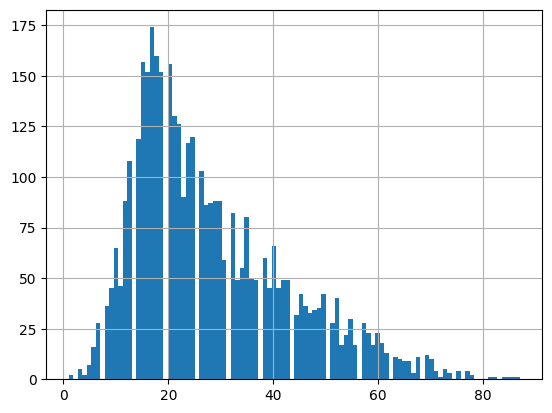

In [30]:
df["Age"].dropna().hist(bins=100)

6. About 74% of attacks are unprovoked

In [35]:
df["Type"] = df["Type"].where(
    df["Type"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)

df["Type"].value_counts()

,count
Type,
Unprovoked,5225
Unknown,1207
Provoked,642


In [36]:
type_counts = df["Type"].value_counts(normalize=True)
type_counts["Unprovoked"]

np.float64(0.738620299689002)

7.

In [52]:
df["Fatal Y/N"] = df["Fatal Y/N"].where(
    df["Fatal Y/N"].isin(["Y", "N"]),
    "Unknown"
)

df["Fatal Y/N"].value_counts()
df.head(50)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39.0,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11.0,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
5,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27.0,...,N,1820hrs,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
6,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12.0,...,Y,1620hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
7,13th January,2026.0,Unprovoked,USA,California,Mendocino County,Surfing,Tommy Civic,M,26.0,...,N,0830hrs,Suspected GWS,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
8,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,NaN,...,N,0540hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
9,8th January,2026.0,Unprovoked,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Snorkeling,Arlene Lillis,F,56.0,...,Y,1628hrs,Unknown,Todd Smith: KevinMcMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN


8. Surprisingly attacks that are unprovked seem to be more likely to be fatal. That could be because there are more unprovked attacks and also because if you do provoke a shark, you would expect it to attack and you would be prepared. You are likely not prepared or aware for an unprovoked attack.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about making data cleaning easier by "data tidying". A tidy dataset is easier to manipulate, model, and anaylize

2. The "tidy data standard" is designed to make data analysis easier and make the data analysis tools easier to use

3.

When everything is tidy, it is easy to work with since everything looks the same. Each column is a variable and each observation is a row. Everything is pretty much straightforward. But when a dataset is messy, each issue is messy in a different way. Each mess cannot be solved the same and has to be fixed in their own unqiue way.

 "For a given dataset, it’s usually easy to figure out what observations and what variables, but it is surprisingly difficult to precisely define variables and observations in general." This means that it is usually easy to figure out what each row and column is. The problem occurs when trying to figure out the purpose of the observations or variables. Many people can interpret them differently. Especially across datasets. Datasets can have the same variable or observation, but they could be defined differently

4. Values are either a number or a string and they belong to both a variable and a observation. The same the other way, every variable or observation has a value. Variables measure attributes across units and observations measure units across attributes. You can have multiple variables or attributes for a observation or unit.

5. The key to "Tidy Data" and what separates it from messy data is making sure each variables forms a column, each obsevation forms a row, and each observational unit forms a table. Using the example from the paper, table 1 did not have a column for the results variable, where as table 3 did. Both are tables, but table 3 is easier to understand and analyze because each variable has its own column.

6.

The five most common problems with messy datasets are column headers that are values, not variable names, multiple variables stored in one column, variables stored in both rows and columns, multiple types of observational units stored in the same table, and a single observational unit is stored in multiple tables.

Table 4 is considered messy because income value/varibale is a column header. You want each income to be the column name not the values of income. To fix this, you need to melt it, which means turning the columns into rows. Take income values and put them into rows.

7. Table 11 is messy because the multiple types of observation, like month, day, and min/max, in one table. In table 12 molten, you are now looking at one day per row but min/max are stored in a column when they should be their own columns themsevles. That is the difference in table 12 tidy. You are now looking at the min and max for one day.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [8]:
1.
gift = pd.read_csv('/content/data/ForeignGifts_edu.csv')

gift

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


<Axes: >

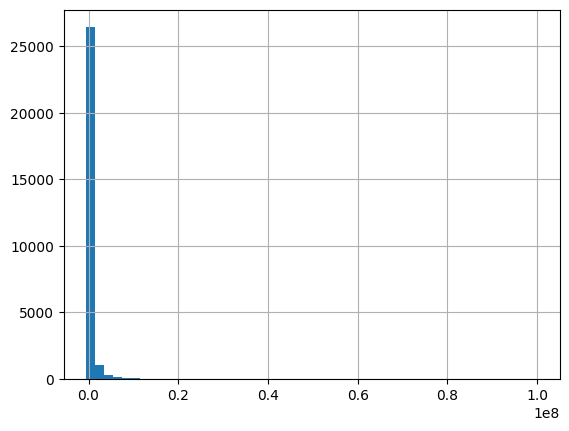

In [23]:
gift["Foreign Gift Amount"].hist(bins=50)

2. The histogram is skewed right. The donation amounts are roughly similar with little variation.

3. Contract have the biggest proportion of gift type with around 61%. Then monetary gift at around 39%. There are only 11 real estate gift types, so their porportion is relatively small and close to 0%

In [30]:
count = gift["Gift Type"].value_counts()

count

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [29]:
proportion = gift["Gift Type"].value_counts(normalize=True)

proportion

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


4. Top 15 countries in terms of number of gifts:

In [33]:

top15_n = (
    gift["Country of Giftor"]
    .value_counts()
    .head(15)
)

top15_n

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


4. Top 15 countries in terms of the amount given:

In [34]:
top15_a = (
    gift.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top15_a

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


5. top 15 institutions in terms of the total amount of money they receive:

In [36]:
top15_receive = (
    gift.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top15_receive

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

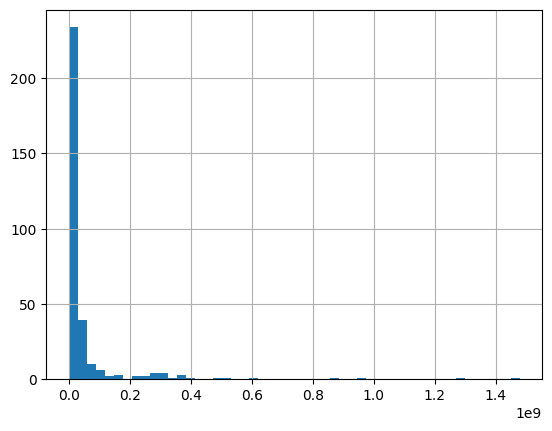

In [38]:
institution_gift = (
    gift.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
)

institution_gift.hist(bins=50)

6. Top gift giftor:

In [41]:
top_giftor = (
    gift.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

top_giftor

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [42]:
1.
college = pd.read_csv('/content/data/college_completion.csv')

college

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0


2. There are 3798 observations and 63 varibales in this dataset

3. When looking at control and level, the most obvious pattern is that Private not-for-profit institutions tend to be a 4 year institution. There is not a big difference between levels for Private for-profit institutions. Public institutions tend to be more 2 year institutions but the difference is not as significant as Private not-for-profit institutions.



In [44]:
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. Overall, private not-for-profit institutions appear to have the most favorable graduation rates according to the plots. Their distribution is further to the right compared to public and private for-profit.

<Axes: ylabel='Density'>

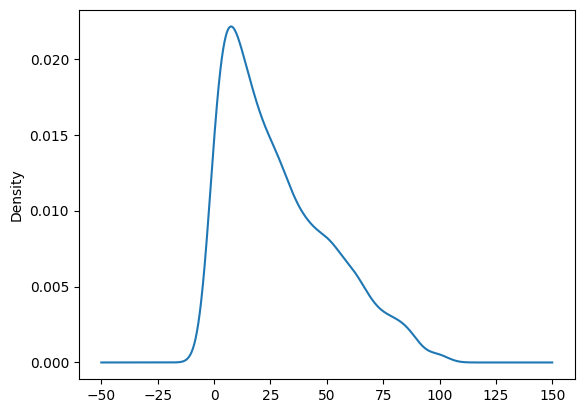

In [45]:
college["grad_100_value"].plot(kind="kde")

,grad_100_value
control,
Private for-profit,"Axes(0.125,0.11;0.775x0.77)"
Private not-for-profit,"Axes(0.125,0.11;0.775x0.77)"
Public,"Axes(0.125,0.11;0.775x0.77)"


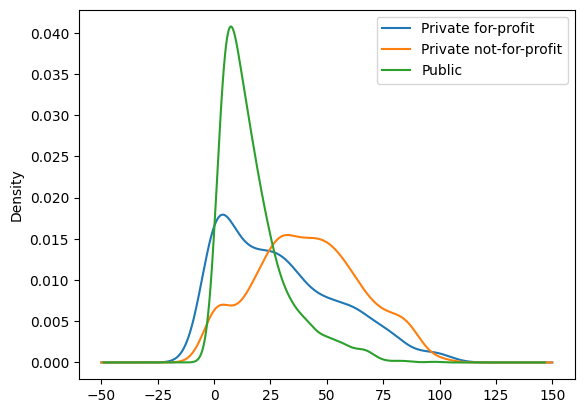

In [47]:
college.groupby("control")["grad_100_value"].plot(kind="kde", legend=True)

5. Without control, "aid_value" and "grad_100_value" have positive corvarience, which indicates they are associated with each other. They also have a moderately strong positive linear correlation. This shows again that they do have a relationship, but it is not that strong. When you add control, you see that private for-profit institutions have a weak relationship between aid and graduation rate. Both private not-for-profit and public insitutions both still have a moderately strong positive correlation with private not-for-profit having the stronger correlation.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

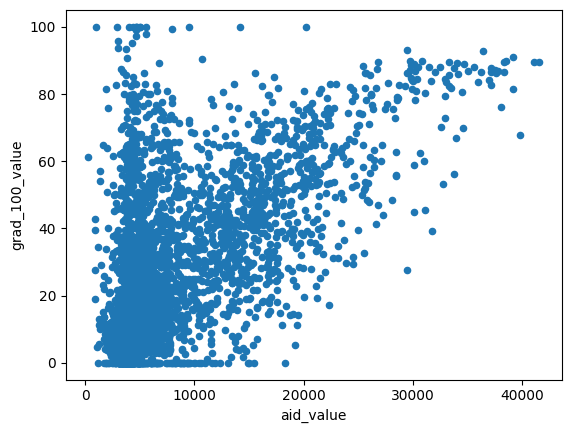

In [48]:
college.plot.scatter(x="aid_value", y="grad_100_value")

In [50]:
college[["aid_value", "grad_100_value"]].cov()


,aid_value,grad_100_value
aid_value,4.121201e+07,88610.483169
grad_100_value,8.861048e+04,543.483382


In [51]:
college[["aid_value", "grad_100_value"]].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


,0
control,
Private for-profit,"Axes(0.125,0.11;0.775x0.77)"
Private not-for-profit,"Axes(0.125,0.11;0.775x0.77)"
Public,"Axes(0.125,0.11;0.775x0.77)"


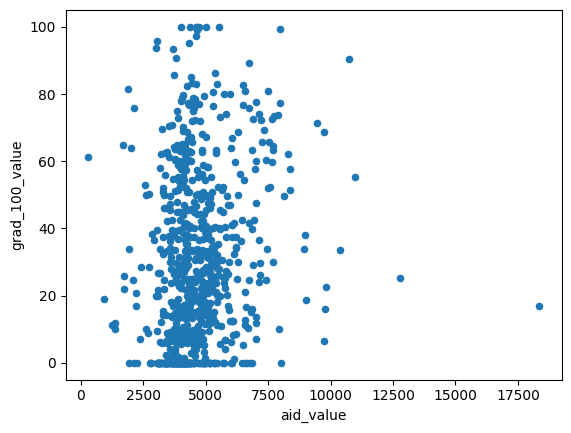

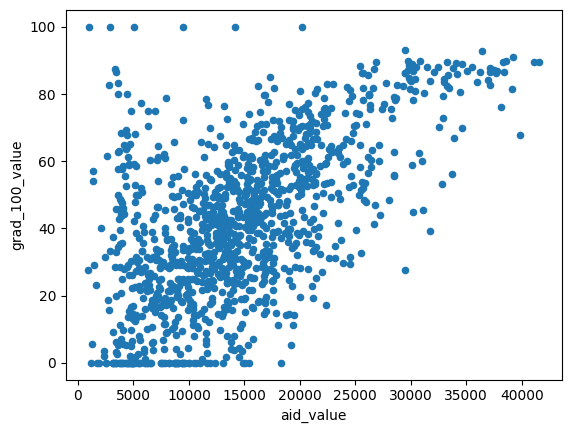

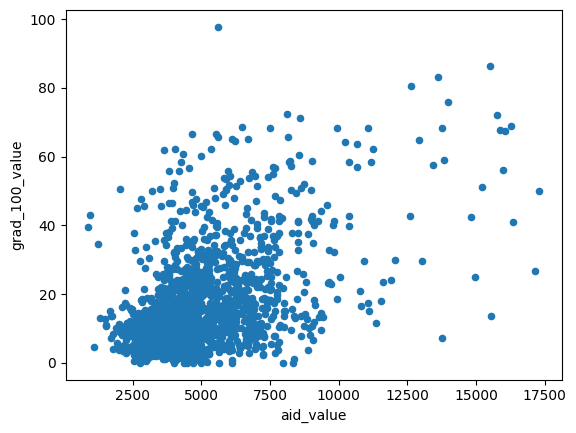

In [53]:
college.groupby("control").plot.scatter(
    x="aid_value",
    y="grad_100_value",
)


In [54]:
college.groupby("control")[["aid_value", "grad_100_value"]].cov()

aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489

In [55]:
college.groupby("control")[["aid_value", "grad_100_value"]].corr()

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?